<a href="https://colab.research.google.com/github/VegaSera/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Copy_of_LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
sales_list = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

In [0]:
def get_mean(nums):
  #Mean is total of all values, divided by number of values.
  tot = 0
  for i in nums:
    tot += i
  return tot/(len(nums))

In [0]:
def get_variance(nums):
  #Variance is Total Sum (Value - Mean)^2 / N -1
  mean = get_mean(nums)
  tot = 0
  for i in nums:
    tot += ((i - mean)**2)
  return tot/(len(nums) - 1)

In [0]:
def get_std(nums):
  #Standard deviation is simply the square root of the variance.
  return get_variance(nums)**0.5

In [0]:
def get_summary_stats(nums):
  #Using a separate function to aggregate the mean, var, and std also allows us to use them on their own if we want.
  mean = get_mean(nums)
  var = get_variance(nums)
  std = get_std(nums)
  return (mean, var, std)

In [6]:
get_summary_stats(sales_list)

(3052.714285714286, 214387.90476190473, 463.0204150595357)

In [12]:
import numpy as np
#Using numpy to check our work.
print(np.mean(sales_list))
print(np.var(sales_list, ddof=1))
print(np.std(sales_list, ddof=1))

3052.714285714286
214387.90476190473
463.0204150595357


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
def get_covariance(xnums, ynums):
  if len(xnums) == len(ynums): # Check to make sure our lists are equal
    xmean = get_mean(xnums)
    ymean = get_mean(ynums)
    tot = 0
    for i, val in enumerate(xnums):
      tot += ((xnums[i] - xmean)*(ynums[i] - ymean))
    return tot/(len(xnums) - 1)
  else:
    print(f'Input lists two different values - {len(xnums)} and {len(ynums)}')
    return False

In [16]:
customer_list = [127, 80, 105, 92, 120, 115, 93]
get_covariance(sales_list, customer_list)

7604.357142857142

In [17]:
np.cov(sales_list, customer_list)
#It seems like np.cov returns the correct value we calculate, but also the covariance for sales_list compared to itself, and customer_list compared to itself.

array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
def get_correlation(xnums, ynums):
  covar = get_covariance(xnums, ynums) #getting covariance
  return (covar /(get_std(xnums) * get_std(ynums))) 

In [20]:
get_correlation(sales_list, customer_list)

0.9628339778148909

In [22]:
import pandas as pd
data = {'sales':sales_list, 'customers':customer_list}
df = pd.DataFrame(data)
df.corr()
#our correlation coefficient matches what we expect.

,sales,customers
sales,1.000000,0.962834
customers,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [23]:
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
df

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.000000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.916700,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.000000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,1306,3.0,0.0,"Zabour, Miss. Thamine",female,29.881135,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN,0
1306,1307,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.500000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN,0
1307,1308,3.0,0.0,"Zakarian, Mr. Ortin",male,27.000000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN,0
1308,1309,3.0,0.0,"Zimmerman, Mr. Leo",male,29.000000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN,0


In [24]:
df.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [25]:
df.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

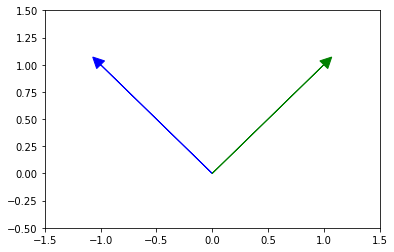

In [26]:
#Synonym for Orthogonal is Perpendicular
import matplotlib.pyplot as plt


vect_1 = [-1, 1]
vect_2 = [1, 1]

plt.arrow(0, 0, vect_1[0], vect_1[1], head_width=0.1, head_length=0.1, color='blue')
plt.arrow(0, 0, vect_2[0], vect_2[1], head_width=0.1, head_length=0.1, color='green')
plt.xlim(-1.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [27]:
a_vect = np.array([-5, 3, 7])
b_vect = np.array([6, -8, 2])
np.dot(a_vect, b_vect)
#They are not orthogonal because their dot product is not 0.

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [68]:
c = np.array([2, -15, 6, 20])

print(np.linalg.norm(c)**2)
print(np.dot(c, c))
print(np.matmul(c.T, c))

#The norm, the dot product (dot squared, perhaps?) and c times its transpose are all the same.


665.0
665
665


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}    
\end{align}

 \begin{align}
 ||d|| = \sqrt{7^2 + 12^2} = \sqrt{49 + 144} = \sqrt{193} = 13.89
\end{align}

 \begin{align}
 \hat{d} = \frac{1}{||d||}d = \frac{1}{13.89}\begin{bmatrix} 7 \\ 12 \end{bmatrix} = \begin{bmatrix} 0.503 \\ 0.863 \end{bmatrix}
\end{align}


---



\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} - 8\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}= 2\hat{i} + 11\hat{j} - 8\hat{k}
\end{align}

 \begin{align}
 ||e|| = \sqrt{2^2 + 11^2 + -8^2} = \sqrt{4 + 121 + 64} = \sqrt{189} = 13.74
\end{align}

 \begin{align}
 \hat{e} = \frac{1}{||e||}e = \frac{1}{13.74}\begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = \begin{bmatrix} 0.1454 \\ 0.8001 \\ -0.581\end{bmatrix}
\end{align}


## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [40]:
f_vect = np.array([4, 12, 11, 9, 2])
f_hat = f_vect / np.linalg.norm(f_vect)
f_hat

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


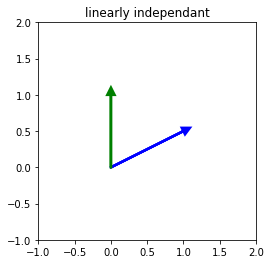

In [49]:
#linearly independent 
vect_1 = [1,0.5]
vect_2 = [0,1]

plt.arrow(0, 0, vect_1[0], vect_1[1], linewidth=2.5, head_width=.1, head_length=0.1, color ='blue')
plt.arrow(0, 0, vect_2[0], vect_2[1], linewidth=2.5, head_width=.1, head_length=0.1, color ='green')
plt.xlim(-1,2)   
plt.ylim(-1,2)
plt.axes().set_aspect('equal')
plt.title("linearly independant")
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


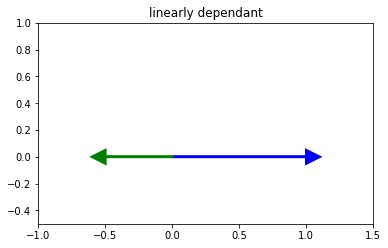

In [58]:
#linearly dependent 
vect_1 = [1, 0]
vect_2 = [-0.5,0]

plt.arrow(0, 0, vect_1[0], vect_1[1], linewidth=2.5, head_width=.1, head_length=0.1, color ='blue')
plt.arrow(0, 0, vect_2[0], vect_2[1], linewidth=2.5, head_width=.1, head_length=0.1, color ='green')
plt.xlim(-1,1.5)   
plt.ylim(-0.5,1)
plt.axes().set_aspect('equal')
plt.title("linearly dependant")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [84]:
g_vect = np.array([1, 2])
h_vect = np.array([4, 8])
g_mat = np.stack((g_vect, h_vect))
np.linalg.matrix_rank(g_mat) #As far as I can tell, Span and Rank are the same thing.
#Span of these vectors is 1. They are linearly dependant

1

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [83]:
l_vect= np.array([1, 2, 3])
m_vect = np.array([-1, 0, 7])
n_vect = np.array([4, 8, 2])

l_mat = np.stack((l_vect, m_vect, n_vect))
np.linalg.matrix_rank(l_mat)
#Span of these vectors is 3. They are all linearly independent.

3

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



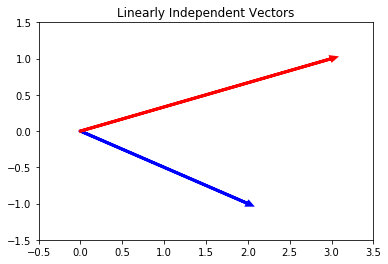

In [91]:
a = [2,-1] 
b = [3, 1]

# Plot Vectors
plt.arrow(0,0, a[0], a[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, b[0], b[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.xlim(-0.5,3.5)          
plt.ylim(-1.5,1.5)
plt.title("Linearly Independent Vectors")
plt.show()

## 6.2 What does it mean to form a basis?

A basis is a set of vectors that are linearly independant and can span to fill the space. With two vectors, that space is two dimensional.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [85]:
p_mat = l_mat #This matrix is the same as the l, m, n set of vectors above.
np.linalg.matrix_rank(p_mat)
#This matrix is Rank 3. If there is any difference between span and matrix rank, I cannot see it.

3

## 7.2 What does the rank of a matrix tell us?

It tells us the true dimensionality of the matrix. If our rank is less than our number of columns, that tells us some of those columns are redundant and linearly dependent with other columns.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [0]:
v_vect = np.array([1, 3])
w_vect = np.array([-1, 2])

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

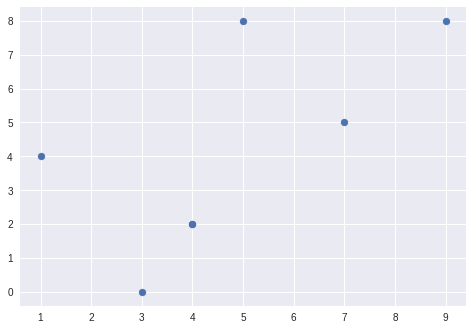

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()